# Analysis of Tweets using NLP,Tensorflow and LSTM model 

In [1]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
#Loading of data
df = pd.read_excel("Tweet_NFT.xlsx")

In [3]:
df.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765.0,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766.0,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767.0,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [4]:
df.shape

(127453, 4)

In [5]:
#Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                127453 non-null  float64
 1   tweet_text        127453 non-null  object 
 2   tweet_created_at  127453 non-null  object 
 3   tweet_intent      96364 non-null   object 
dtypes: float64(1), object(3)
memory usage: 3.9+ MB


In [6]:
df.isnull().sum()

id                      0
tweet_text              0
tweet_created_at        0
tweet_intent        31089
dtype: int64

There are 31089 are missing in tweet_intent column
to fill these values I have used fillna method ('ffill')

In [7]:
df.fillna(method='ffill')

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765.0,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766.0,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767.0,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community
...,...,...,...,...
127448,1278721.0,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,Appreciation
127449,1278723.0,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,Appreciation
127450,1278724.0,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,Appreciation
127451,1278725.0,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,Appreciation


In [8]:
df.tweet_intent.unique()

array(['Community', 'Giveaway', 'Appreciation', 'Presale', 'Whitelist',
       'pinksale', 'Done', 'Interested', 'Launching Soon', nan],
      dtype=object)

In [9]:
df.tweet_intent.value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: tweet_intent, dtype: int64

# Analysing the features in tweet_intent

<AxesSubplot:xlabel='tweet_intent', ylabel='count'>

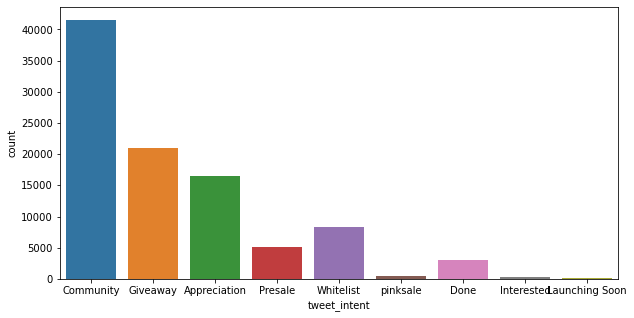

In [10]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='tweet_intent', data = df)

# Preprocessing
Removing URL and Punctuations in tweets

In [11]:
# Preprocessing
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://(\S+|www)\.\S+")
    return url.sub(r"", text)

# Remove punctuation
def remove_punct(text):
    translator = str.maketrans("","",string.punctuation)
    return text.translate(translator)

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in df.tweet_text:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"",t))
    if len(matches) > 0:
        break

@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @ItsukiNFT @thelittlesnft @SpaceRiders_NFT @WDoopsies @WomenandWeapons @WoWPixiesNFT @BokiNFT @quirkiesnft @bitcoin_bowie @Kal_El_Krypto_ @sophiegreen86 ðŸ_x0090_¶ A new cryptocurrency was born by fans of the Chihuahua meme community. It's just simply pets love and keep 1% from each transaction which will be automatically distributed. 
â€¼ï¸_x008f_CA: 0x2fd6c9B869Dea106730269E13113361b684f843a
 @Chihuahua_bsc
TG: https://t.co/wqSzCivfaM
t
@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @ItsukiNFT @thelittlesnft @SpaceRiders_NFT @WDoopsies @WomenandWeapons @WoWPixiesNFT @BokiNFT @quirkiesnft @bitcoin_bowie @Kal_El_Krypto_ @sophiegreen86 ðŸ_x0090_¶ A new cryptocurrency was born by fans of the Chihuahua meme community. It's just simply pets love and keep 1% from each transaction which will be automatically distributed. 
â€¼ï¸_x008f_CA: 0x2fd6c9B869Dea106730269E13113361b684f843a
 @Chihuahua_bsc
TG: 


In [13]:
df["tweet_text"] = df.tweet_text.map(remove_URL) # map(lambda x; remove_URL(x))
df["tweet_text"] = df.tweet_text.map(remove_punct)

In [14]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [15]:
# remove stopwords
# pip install nltk
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Stop words: A stop word is a commonly used word ( such as "the", "a", "an", "in") that a search engine
# has been programmed to ignore both when indexing entries for searching and when retrieving them
# as the result of a search queary.
stop = set(stopwords.words("english"))

# https://stackoverflow.com/questions/how to remove-stop-words-using-nltk-or-python
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [17]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [18]:
df["tweet_text"] = df.tweet_text.map(remove_stopwords)

In [19]:
df.tweet_text

0         cryptobrody ecology1990 moonrunnersnft itsukin...
1         need sick character artâx009d“art artist artis...
2         thehulknft inagotchinft tesla killabearsnft el...
3         cryptobatznft darekbtw first project crypto mo...
4         sashadysonn first project crypto move earn ast...
                                ...                        
127448    jason company universe solving weve got columb...
127449                          bosotokyo many get rekt nft
127450    leeneedham81 kibainuworld hodlofficial koacomb...
127451                         1kz3ro unleashednft love job
127452                        shillronin unleashednft proof
Name: tweet_text, Length: 127453, dtype: object

In [20]:
#Counting Unique Words
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
        return count
    
counter = counter_word(df.tweet_text)

In [21]:
len(counter)

34

In [22]:
counter

Counter({'cryptobrody': 1,
         'ecology1990': 1,
         'moonrunnersnft': 1,
         'itsukinft': 1,
         'thelittlesnft': 1,
         'spaceridersnft': 1,
         'wdoopsies': 1,
         'womenandweapons': 1,
         'wowpixiesnft': 1,
         'bokinft': 1,
         'quirkiesnft': 1,
         'bitcoinbowie': 1,
         'kalelkrypto': 1,
         'sophiegreen86': 1,
         'ðÿx0090¶': 1,
         'new': 1,
         'cryptocurrency': 1,
         'born': 1,
         'fans': 1,
         'chihuahua': 1,
         'meme': 1,
         'community': 1,
         'simply': 1,
         'pets': 1,
         'love': 1,
         'keep': 1,
         '1': 1,
         'transaction': 1,
         'automatically': 1,
         'distributed': 1,
         'â€¼ï¸x008fca': 1,
         '0x2fd6c9b869dea106730269e13113361b684f843a': 1,
         'chihuahuabsc': 1,
         'tg': 1})

In [23]:
counter.most_common(5)

[('cryptobrody', 1),
 ('ecology1990', 1),
 ('moonrunnersnft', 1),
 ('itsukinft', 1),
 ('thelittlesnft', 1)]

In [24]:
num_unique_words = len(counter)

# Converting tweet_intent features into numerical for predictions

In [25]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['tweet_intent'])
 
# printing label
label

array([1, 3, 0, ..., 9, 9, 9])

In [26]:
# removing the column 'tweet_intent' from df
# as it is of no use now.
df.drop("tweet_intent", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'tweet_intent'
df["tweet_intent"] = label
 
# printing Dataframe
df

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,cryptobrody ecology1990 moonrunnersnft itsukin...,2022-08-06T16:56:36.000Z,1
1,1212763.0,need sick character artâx009d“art artist artis...,2022-08-06T16:56:36.000Z,3
2,1212765.0,thehulknft inagotchinft tesla killabearsnft el...,2022-08-06T16:56:35.000Z,0
3,1212766.0,cryptobatznft darekbtw first project crypto mo...,2022-08-06T16:56:35.000Z,1
4,1212767.0,sashadysonn first project crypto move earn ast...,2022-08-06T16:56:34.000Z,1
...,...,...,...,...
127448,1278721.0,jason company universe solving weve got columb...,2022-08-08T03:32:01.000Z,9
127449,1278723.0,bosotokyo many get rekt nft,2022-08-08T03:32:00.000Z,9
127450,1278724.0,leeneedham81 kibainuworld hodlofficial koacomb...,2022-08-08T03:32:00.000Z,9
127451,1278725.0,1kz3ro unleashednft love job,2022-08-08T03:31:59.000Z,9


In [27]:
# Split dataset into training and validation set
train_size = int(df.shape[0] * 0.8)

train_df = df[:train_size]
val_df = df[train_size:]

# split text and labels
train_sentences = train_df.tweet_text.to_numpy()
train_labels = train_df.tweet_intent.to_numpy()
val_sentences = val_df.tweet_text.to_numpy()
val_labels = val_df.tweet_intent.to_numpy()

In [28]:
train_sentences.shape, val_sentences.shape

((101962,), (25491,))

In [29]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [30]:
# each word has a unique index
word_index = tokenizer.word_index

In [31]:
word_index

{'nft': 1,
 'community': 2,
 'great': 3,
 'artists': 4,
 'collectors': 5,
 'feature': 6,
 'globalnft07': 7,
 'project': 8,
 'nftcommunity': 9,
 'nfts': 10,
 'giveaway': 11,
 'airdrop': 12,
 'crypto': 13,
 'join': 14,
 'âœ…': 15,
 'bsc': 16,
 'eth': 17,
 'good': 18,
 'opensea': 19,
 'token': 20,
 'gamefi': 21,
 'premintnft': 22,
 'check': 23,
 'nftart': 24,
 'get': 25,
 'btc': 26,
 'nftgiveaway': 27,
 'metaverse': 28,
 'game': 29,
 'registered': 30,
 'big': 31,
 'amp': 32,
 'collection': 33,
 'bnb': 34,
 'first': 35,
 'nftcollector': 36,
 'art': 37,
 'via': 38,
 'best': 39,
 'new': 40,
 'ðÿž‰': 41,
 'make': 42,
 'telegram': 43,
 'web3': 44,
 'earn': 45,
 'mint': 46,
 'ðÿ‘‰': 47,
 'richquack': 48,
 'one': 49,
 'done': 50,
 'high': 51,
 'thank': 52,
 'like': 53,
 'wl': 54,
 'elonmusk': 55,
 'thanks': 56,
 'nice': 57,
 'whitelist': 58,
 'real': 59,
 'discord': 60,
 'nftartist': 61,
 'nftdrop': 62,
 'ðÿš€': 63,
 'â€¢': 64,
 'win': 65,
 'wow': 66,
 'space': 67,
 'follow': 68,
 'tweet': 69,
 

In [32]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [33]:
print(train_sentences[10:15])
print(train_sequences[10:15])

['greatmandonft depends' 'promote nftcommunity ðÿ˜x008d'
 'registered harakainft raffle free mint super low supply freemint via premintnft'
 'cooitimes cubexnft tfgmykl theapiens bapesclan definitely gonna missed nft lfggggggðÿ”¥ incubexwetrust cubextakeover nftcommunity nfts'
 'deadknightsol project 21 best gamefi project bsc âœ…multistage deflation tool pro21 âœ…multifeature nft âœ…app appstore google play âœ…presale august p21 going moon whitelist tg project21 p21 gamefi']
[[], [9], [30, 22], [1, 9, 10], [8, 21, 8, 16, 1, 21]]


In [34]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in sequence
max_length = 20

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((101962, 20), (25491, 20))

In [35]:
train_padded[10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

greatmandonft depends
[]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
# check reversing the indices

# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [38]:
reverse_word_index

{1: 'nft',
 2: 'community',
 3: 'great',
 4: 'artists',
 5: 'collectors',
 6: 'feature',
 7: 'globalnft07',
 8: 'project',
 9: 'nftcommunity',
 10: 'nfts',
 11: 'giveaway',
 12: 'airdrop',
 13: 'crypto',
 14: 'join',
 15: 'âœ…',
 16: 'bsc',
 17: 'eth',
 18: 'good',
 19: 'opensea',
 20: 'token',
 21: 'gamefi',
 22: 'premintnft',
 23: 'check',
 24: 'nftart',
 25: 'get',
 26: 'btc',
 27: 'nftgiveaway',
 28: 'metaverse',
 29: 'game',
 30: 'registered',
 31: 'big',
 32: 'amp',
 33: 'collection',
 34: 'bnb',
 35: 'first',
 36: 'nftcollector',
 37: 'art',
 38: 'via',
 39: 'best',
 40: 'new',
 41: 'ðÿž‰',
 42: 'make',
 43: 'telegram',
 44: 'web3',
 45: 'earn',
 46: 'mint',
 47: 'ðÿ‘‰',
 48: 'richquack',
 49: 'one',
 50: 'done',
 51: 'high',
 52: 'thank',
 53: 'like',
 54: 'wl',
 55: 'elonmusk',
 56: 'thanks',
 57: 'nice',
 58: 'whitelist',
 59: 'real',
 60: 'discord',
 61: 'nftartist',
 62: 'nftdrop',
 63: 'ðÿš€',
 64: 'â€¢',
 65: 'win',
 66: 'wow',
 67: 'space',
 68: 'follow',
 69: 'tweet',
 

In [39]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [40]:
decoded_text =decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[]



# LSTM MODEL

In [41]:
# Create LSTM model
from tensorflow.keras import layers

# Embedding : https://www.tensorflow.org/tutorials/text/word_embeddings
# Truns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

# word embeddings give us a way to use an efficient, dense representation in which similar word have
# a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a 
# dense vector of floating point values (the length of the vector is a parameter you specify)

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

# The layer will take as input an integer matrix of size (batch, input_length)
# and the largest integer (i.e word index) in the input should be no larger than num_words (vocabulary size).
# Now model.output_shape is (None, input_length, 32), where 'None' is the batch dimension

model.add(layers.LSTM(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            1088      
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 25,985
Trainable params: 25,985
Non-trainable params: 0
_________________________________________________________________


In [42]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [43]:
model.fit(train_padded, train_labels, epochs=20, validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/20
3187/3187 - 27s - loss: -1.6728e+02 - accuracy: 0.4071 - val_loss: -1.6773e+03 - val_accuracy: 0.0000e+00 - 27s/epoch - 8ms/step
Epoch 2/20
3187/3187 - 26s - loss: -4.6200e+02 - accuracy: 0.4071 - val_loss: -3.2329e+03 - val_accuracy: 0.0000e+00 - 26s/epoch - 8ms/step
Epoch 3/20
3187/3187 - 27s - loss: -7.5691e+02 - accuracy: 0.4071 - val_loss: -4.8168e+03 - val_accuracy: 0.0000e+00 - 27s/epoch - 8ms/step
Epoch 4/20
3187/3187 - 27s - loss: -1.0566e+03 - accuracy: 0.4071 - val_loss: -6.4051e+03 - val_accuracy: 0.0000e+00 - 27s/epoch - 8ms/step
Epoch 5/20
3187/3187 - 26s - loss: -1.3554e+03 - accuracy: 0.4071 - val_loss: -7.9890e+03 - val_accuracy: 0.0000e+00 - 26s/epoch - 8ms/step
Epoch 6/20
3187/3187 - 26s - loss: -1.6542e+03 - accuracy: 0.4071 - val_loss: -9.5779e+03 - val_accuracy: 0.0000e+00 - 26s/epoch - 8ms/step
Epoch 7/20
3187/3187 - 27s - loss: -1.9526e+03 - accuracy: 0.4071 - val_loss: -1.1159e+04 - val_accuracy: 0.0000e+00 - 27s/epoch - 8ms/step
Epoch 8/20
3187/3187

# PREDICTIONS

In [44]:
predictions = model.predict(train_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

3187/3187 [==============================] - 12s 4ms/step


In [45]:
print(train_sentences[10:20])

print(train_labels[10:20])
print(predictions[10:20])

['greatmandonft depends' 'promote nftcommunity ðÿ˜x008d'
 'registered harakainft raffle free mint super low supply freemint via premintnft'
 'cooitimes cubexnft tfgmykl theapiens bapesclan definitely gonna missed nft lfggggggðÿ”¥ incubexwetrust cubextakeover nftcommunity nfts'
 'deadknightsol project 21 best gamefi project bsc âœ…multistage deflation tool pro21 âœ…multifeature nft âœ…app appstore google play âœ…presale august p21 going moon whitelist tg project21 p21 gamefi'
 'gtgtgt ready join gakkoverse ltltlt via premintnft'
 'promote nftcommunity ðÿ˜x008d'
 'comedy church rewarded apostles took leap faith signed onto whitelist check wallet head discord start submitting prayers ðÿ™x008f moonbeam polkadot dot glmr nft nftart'
 'highdoge420 project 21 best gamefi project bsc âœ…multistage deflation tool pro21 âœ…multifeature nft âœ…app appstore google play âœ…presale august p21 going moon whitelist tg project21 p21 gamefi'
 'swissexclusives one top nft projects space micropetsbsc runn